# FIGURE 4

In [2]:
import os
import requests
import pandas as pd
import numpy as np
import nglui
from statistics import mean
import matplotlib.pyplot as plt
import seaborn as sns
import cloudvolume
from caveclient import CAVEclient


client = CAVEclient('minnie65_phase3_v1')
client.info.get_datastack_info()


pd.options.display.max_rows = None
pd.options.display.max_columns = None

#Load dataframe
synapse_table = pd.read_feather("ET_extended_synapse_table_revision.feather")

In [3]:
# MAIN
#create list of neurons for Figure 4 plots

V1_neurons = synapse_table[synapse_table['pre_soma_area'] == 'v1']['pre_pt_root_id'].unique()
HVA_neurons = synapse_table[synapse_table['pre_soma_area'] == 'hva']['pre_pt_root_id'].unique()
All_neurons = list(V1_neurons) + list(HVA_neurons)
#All_neurons



In [4]:
# MAIN
##ANALYSIS
#MAKE STATS DATAFRAME - All synapses and connections

np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []
percentage_no_undetermined = []

#IDs of presynaptic PT neurons
pre_soma_IDs = All_neurons


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
   
    stat_values={

                    'ID': pre_soma_ID, 
                      #SYNAPSES
                    
                    'all_syn_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    'all_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory')]),
                    'all_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory')]),
        
                    'all_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_class']))]),
                    
        
                    'all_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P')]),
        
                    'all_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P')]),
                    'all_5P-ET_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-ET')]),
                    'all_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP')]), 
                    'all_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT')]), 
                
                    'all_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P')]),
        
                    'all_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC')]),
        
                    'all_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC')]),
        
                    'all_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC')]),
        
                    'all_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC')]),
        
                    'all_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_subclass']))]),
                    
                    'all_Undetermined_subclass_e_syn#': len(synapse_table[((synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory')) &
                                     ((synapse_table['consensus_subclass'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_subclass']))]),
                    
                    'all_Undetermined_subclass_i_syn#': len(synapse_table[((synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory')) &
                                     ((synapse_table['consensus_subclass'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_subclass']))]),
                    
                     
        
        #CONNECTIONS
                    'all_con_total': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]
                                         ['post_pt_root_id'].unique()),
                    
                    'all_e_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory')]
                                      ['post_pt_root_id'].unique()),
                    
                    'all_i_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory')]
                                      ['post_pt_root_id'].unique()),
        
                    'all_Undetermined_class_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_class']))]['post_pt_root_id'].unique()),                      
        
                    'all_23P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P')]['post_pt_root_id'].unique()),
        
                    'all_4P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P')]['post_pt_root_id'].unique()),
                    
                    'all_5P-ET_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-ET')]['post_pt_root_id'].unique()),
                    
                    'all_5P-NP_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP')]['post_pt_root_id'].unique()), 
 
                    'all_5P-IT_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT')]['post_pt_root_id'].unique()),
                    
                    'all_6P_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P')]['post_pt_root_id'].unique()),
                                    
                    'all_BC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC')]['post_pt_root_id'].unique()),
                     
                    'all_MC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC')]['post_pt_root_id'].unique()),
       
                    'all_BPC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC')]['post_pt_root_id'].unique()),
                    
                    'all_NGC_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC')]['post_pt_root_id'].unique()),
        
                    'all_Undetermined_subclass_con#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'unclear') |
                                      pd.isnull(synapse_table['consensus_subclass']))]['post_pt_root_id'].unique()),
                        
        
    }
    values.append(stat_values)
    
    
    stat_percentage={

                    'ID': pre_soma_ID, 
                      
                    'i_syn': stat_values['all_i_syn#'] / stat_values['all_syn_total'],
                    'e_syn': stat_values['all_e_syn#'] / stat_values['all_syn_total'],
                    'Undetermined_class_syn': stat_values['all_Undetermined_class_syn#'] / stat_values['all_syn_total'],
        
                    '23P_syn': stat_values['all_23P_syn#'] / (stat_values['all_syn_total']),
                    '4P_syn': stat_values['all_4P_syn#'] / (stat_values['all_syn_total']),
                    '5P-ET_syn': stat_values['all_5P-ET_syn#'] / (stat_values['all_syn_total']),
                    '5P-IT_syn': stat_values['all_5P-IT_syn#'] / (stat_values['all_syn_total']),
                    '5P-NP_syn': stat_values['all_5P-NP_syn#'] / (stat_values['all_syn_total']),
                    '6P_syn': stat_values['all_6P_syn#'] / (stat_values['all_syn_total']),
                    'BC_syn': stat_values['all_BC_syn#'] / (stat_values['all_syn_total']),
                    'MC_syn': stat_values['all_MC_syn#'] / (stat_values['all_syn_total']),
                    'BPC_syn': stat_values['all_BPC_syn#'] / (stat_values['all_syn_total']),
                    'NGC_syn': stat_values['all_NGC_syn#'] / (stat_values['all_syn_total']),
                    'Undetermined_subclass_syn': stat_values['all_Undetermined_subclass_syn#'] / stat_values['all_syn_total'],
        
        
                    'i_con': stat_values['all_i_con#'] / stat_values['all_con_total'],
                    'e_con': stat_values['all_e_con#'] / stat_values['all_con_total'],
                    'Undetermined_class_con': stat_values['all_Undetermined_class_con#'] / stat_values['all_con_total'],
                   
        
                    '23P_con': stat_values['all_23P_con#'] / stat_values['all_con_total'],
                    '4P_con': stat_values['all_4P_con#'] / stat_values['all_con_total'],
                    '5P-ET_con': stat_values['all_5P-ET_con#'] / stat_values['all_con_total'],
                    '5P-IT_con': stat_values['all_5P-IT_con#'] / stat_values['all_con_total'],
                    '5P-NP_con': stat_values['all_5P-NP_con#'] / stat_values['all_con_total'],
                    '6P_con': stat_values['all_6P_con#'] / stat_values['all_con_total'],
                    'BC_con': stat_values['all_BC_con#'] / stat_values['all_con_total'],
                    'MC_con': stat_values['all_MC_con#'] / stat_values['all_con_total'],
                    'BPC_con': stat_values['all_BPC_con#'] / stat_values['all_syn_total'],
                    'NGC_con': stat_values['all_NGC_con#'] / stat_values['all_con_total'],
                    'Undetermined_subclass_con': stat_values['all_Undetermined_subclass_con#'] / stat_values['all_con_total'],
                   
    }
    percentage.append(stat_percentage) 
    


    
    stat_percentage_no_undetermined={

                    'ID': pre_soma_ID, 
                      
                    'i_syn': stat_values['all_i_syn#'] / (stat_values['all_syn_total']-stat_values['all_Undetermined_class_syn#']),
                    'e_syn': stat_values['all_e_syn#'] / (stat_values['all_syn_total']-stat_values['all_Undetermined_class_syn#']),
                    
                    '23P_syn': stat_values['all_23P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '4P_syn': stat_values['all_4P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-ET_syn': stat_values['all_5P-ET_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-IT_syn': stat_values['all_5P-IT_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '5P-NP_syn': stat_values['all_5P-NP_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    '6P_syn': stat_values['all_6P_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'BC_syn': stat_values['all_BC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'MC_syn': stat_values['all_MC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'BPC_syn': stat_values['all_BPC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'NGC_syn': stat_values['all_NGC_syn#'] / (stat_values['all_syn_total'] - stat_values['all_Undetermined_subclass_syn#']),
                    'Undetermined_subclass_syn': stat_values['all_Undetermined_subclass_syn#'] / stat_values['all_syn_total'],
        
        
                    'i_con': stat_values['all_i_con#'] / stat_values['all_con_total'],
                    'e_con': stat_values['all_e_con#'] / stat_values['all_con_total'],
                    'Undetermined_class_con': stat_values['all_Undetermined_class_con#'] / stat_values['all_con_total'],
                   
        
                    '23P_con': stat_values['all_23P_con#'] / stat_values['all_con_total'],
                    '4P_con': stat_values['all_4P_con#'] / stat_values['all_con_total'],
                    '5P-ET_con': stat_values['all_5P-ET_con#'] / stat_values['all_con_total'],
                    '5P-IT_con': stat_values['all_5P-IT_con#'] / stat_values['all_con_total'],
                    '5P-NP_con': stat_values['all_5P-NP_con#'] / stat_values['all_con_total'],
                    '6P_con': stat_values['all_6P_con#'] / stat_values['all_con_total'],
                    'BC_con': stat_values['all_BC_con#'] / stat_values['all_con_total'],
                    'MC_con': stat_values['all_MC_con#'] / stat_values['all_con_total'],
                    'BPC_con': stat_values['all_BPC_con#'] / stat_values['all_syn_total'],
                    'NGC_con': stat_values['all_NGC_con#'] / stat_values['all_con_total'],
                    'Undetermined_subclass_con': stat_values['all_Undetermined_subclass_con#'] / stat_values['all_con_total'],
                   
    }
    percentage_no_undetermined.append(stat_percentage_no_undetermined) 
    
    
    
synapse_table_values = pd.DataFrame(values)
synapse_table_percentage = pd.DataFrame(percentage)
synapse_table_percentage_no_undetermined = pd.DataFrame(percentage_no_undetermined)



#total_values = pd.DataFrame(synapse_table_values.sum(), columns=parts.columns, index=["Total"])
#stats_type.append(stat)   


In [5]:
#MAIN synapse_table_values
#Figure 4.d

#for this calculation "all_syn" does not include the synapses for each the
#class is unclear

all_syn = synapse_table_values['all_syn_total'].sum() - synapse_table_values['all_Undetermined_class_syn#'].sum()

print(all_syn)   


Fig4d_dict = {
                '23P': synapse_table_values['all_23P_syn#'].sum() / all_syn,
                '4P': synapse_table_values['all_4P_syn#'].sum() / all_syn,
                '5P-ET': synapse_table_values['all_5P-ET_syn#'].sum() / all_syn,
                '5P-NP': synapse_table_values['all_5P-NP_syn#'].sum() / all_syn,
                '5P-IT': synapse_table_values['all_5P-IT_syn#'].sum() / all_syn,
                '6P': synapse_table_values['all_6P_syn#'].sum() / all_syn,
                'BC': synapse_table_values['all_BC_syn#'].sum() / all_syn,
                'MC': synapse_table_values['all_MC_syn#'].sum() / all_syn,
                'BPC': synapse_table_values['all_BPC_syn#'].sum() / all_syn,
                'NGC': synapse_table_values['all_NGC_syn#'].sum() / all_syn,
                'e_undetermined': synapse_table_values['all_Undetermined_subclass_e_syn#'].sum() / all_syn,
                'i_undetermined': synapse_table_values['all_Undetermined_subclass_i_syn#'].sum() / all_syn,
    
  
}


Fig4d_df = pd.DataFrame(Fig4d_dict, index=[0])

Fig4d_df



5140


,23P,4P,5P-ET,5P-NP,5P-IT,6P,BC,MC,BPC,NGC,e_undetermined,i_undetermined
0,0.066732,0.018677,0.041634,0.052335,0.137354,0.168677,0.272763,0.165759,0.008171,0.002918,0.035409,0.029572


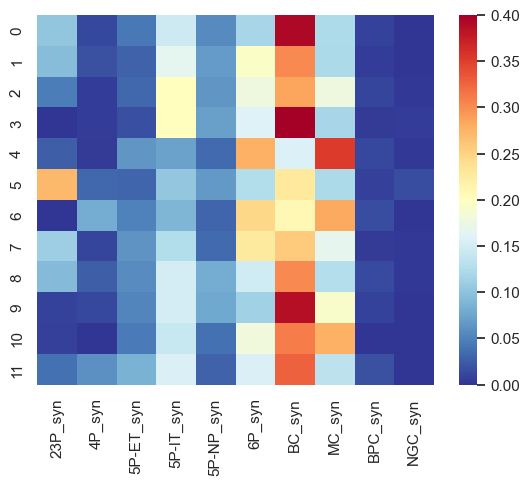

In [6]:
# MAIN
# FIGURE 4.a UPPER PANNEL

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#individual cells
heat_synapse_table = synapse_table_percentage_no_undetermined[['23P_syn','4P_syn','5P-ET_syn','5P-IT_syn','5P-NP_syn','6P_syn','BC_syn','MC_syn','BPC_syn','NGC_syn']]
heat_synapse_table_E = synapse_table_percentage_no_undetermined[['23P_syn','4P_syn','5P-ET_syn','5P-IT_syn','5P-NP_syn','6P_syn']]
heat_synapse_table_I = synapse_table_percentage_no_undetermined[['BC_syn','MC_syn','BPC_syn','NGC_syn']]

sns.set()

ax = sns.heatmap(heat_synapse_table, cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4a_heatmap_all_synapses_individual_ETneurons_revision.pdf", format='pdf', dpi=1200)
plt.savefig('Fig4a_heatmap_all_synapses_individual_ETneurons_revision.eps')

plt.show()

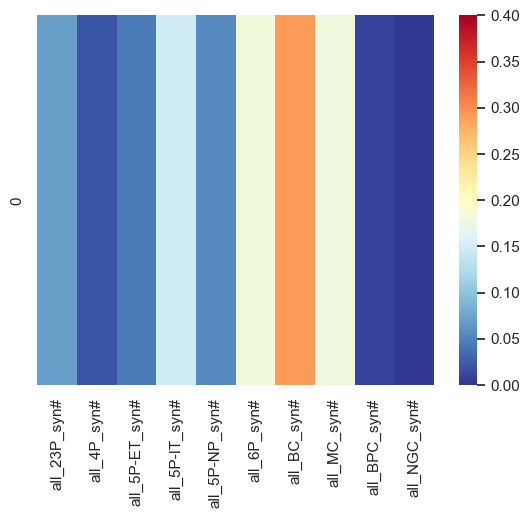

In [7]:
# MAIN
# FIGURE 4.a lower PANNEL

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#total percantages
short_synapse = synapse_table_values[['all_23P_syn#','all_4P_syn#','all_5P-ET_syn#','all_5P-IT_syn#','all_5P-NP_syn#',
                                      'all_6P_syn#','all_BC_syn#','all_MC_syn#','all_BPC_syn#','all_NGC_syn#']]
total_percentages = pd.DataFrame(short_synapse.sum()) / pd.DataFrame(short_synapse.sum()).sum()

sns.set()

ax = sns.heatmap(total_percentages.transpose(), cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4a_heatmap_all_synapses_ETsum.pdf", format='pdf', dpi=1200)
plt.savefig('Fig4a_heatmap_all_synapses_ETsum_revision.eps')

plt.show()

In [8]:
# MAIN
# ANALYSIS - FIGURE 4.b and 4.c
# MAKE STATS DATAFRAME - All synapses formed with soma selected by area

np.seterr(divide='ignore', invalid='ignore')

percentage = []
values = []

#IDs of presynaptic PT neurons
pre_soma_IDs = All_neurons


for ii,pre_soma_ID in enumerate(pre_soma_IDs):        
        
   
    stat_values={

                    'ID': pre_soma_ID,
                    'local_area': synapse_table[synapse_table['pre_pt_root_id'] == 
                                                     pre_soma_ID]['pre_soma_area'].unique()[0],
                  
                    #SYNAPSES
        
                    #V1
                    
                    'all_total_syn#': len(synapse_table[ (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
        
                    'NO_AREA_total_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                                            pd.isnull(synapse_table['post_soma_area'])]),
                     
                    'V1_total_syn#': len(synapse_table[ (synapse_table['post_soma_area'] == 'v1') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),                
                    
                    'V1_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                   
        
                    'V1_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
        
                    
                    'V1_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_class'])) &
                                                                    (synapse_table['post_soma_area'] == 'v1')]),
        
                    'V1_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_5P-ET_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-ET') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP') &
                                                   (synapse_table['post_soma_area'] == 'v1')]), 
                    'V1_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT') &
                                                   (synapse_table['post_soma_area'] == 'v1')]), 
                    'V1_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC') &
                                                   (synapse_table['post_soma_area'] == 'v1')]),
                    'V1_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_subclass'])) &
                                                   (synapse_table['post_soma_area'] == 'v1')]),

        
                    #HVA
                    'HVA_total_syn#': len(synapse_table[ (synapse_table['post_soma_area'] == 'hva') &
                                                    (synapse_table['pre_pt_root_id'] == pre_soma_ID)]),
                    
                    'HVA_i_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'inhibitory') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
        
                    'HVA_e_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_class'] == 'excitatory') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
        
                    'HVA_Undetermined_class_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_class'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_class'])) &
                                                                    (synapse_table['post_soma_area'] == 'hva')]),
                    
                   
                    'HVA_23P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '23P') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_4P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '4P') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_5P-ET_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-ET') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_5P-NP_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-NP') &
                                                   (synapse_table['post_soma_area'] == 'hva')]), 
                    'HVA_5P-IT_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '5P-IT') &
                                                   (synapse_table['post_soma_area'] == 'hva')]), 
                    'HVA_6P_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == '6P') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_BC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BC') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_MC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'MC') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_BPC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'BPC') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_NGC_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     (synapse_table['consensus_subclass'] == 'NGC') &
                                                   (synapse_table['post_soma_area'] == 'hva')]),
                    'HVA_Undetermined_subclass_syn#': len(synapse_table[(synapse_table['pre_pt_root_id'] == pre_soma_ID) &
                                     ((synapse_table['consensus_subclass'] == 'Unsure') |
                                      pd.isnull(synapse_table['consensus_subclass'])) &
                                                   (synapse_table['post_soma_area'] == 'hva')]),

        
        
    }
    values.append(stat_values)
    
    #print(stat_values['HVA_total_syn#'])
    if stat_values['HVA_total_syn#'] > 0:
    
        stat_percentage={

                    'ID': pre_soma_ID,
                    'local_area': synapse_table[synapse_table['pre_pt_root_id'] == 
                                                     pre_soma_ID]['pre_soma_area'].unique()[0],
                     
                    #SYNAPSES
        
                    #V1
        
                    'V1_i_syn': stat_values['V1_i_syn#'] / stat_values['V1_total_syn#'],
                    'V1_e_syn': stat_values['V1_e_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_class_syn': stat_values['V1_Undetermined_class_syn#'] / stat_values['V1_total_syn#'],
                    
        
                    'V1_23P_syn': stat_values['V1_23P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_4P_syn': stat_values['V1_4P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-ET_syn': stat_values['V1_5P-ET_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-IT_syn': stat_values['V1_5P-IT_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-NP_syn': stat_values['V1_5P-NP_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_6P_syn': stat_values['V1_6P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_BC_syn': stat_values['V1_BC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_MC_syn': stat_values['V1_MC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_BPC_syn': stat_values['V1_BPC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_NGC_syn': stat_values['V1_NGC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_Undetermined_subclass_syn': stat_values['V1_Undetermined_subclass_syn#'] / stat_values['V1_total_syn#'],
        
                    #HVA
        
                    'HVA_i_syn': stat_values['HVA_i_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_e_syn': stat_values['HVA_e_syn#'] / stat_values['HVA_total_syn#'],
                    'HVA_Undetermined_class_syn': stat_values['HVA_Undetermined_class_syn#'] / stat_values['HVA_total_syn#'],
                    
        
                    'HVA_23P_syn': stat_values['HVA_23P_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_4P_syn': stat_values['HVA_4P_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_5P-ET_syn': stat_values['HVA_5P-ET_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_5P-IT_syn': stat_values['HVA_5P-IT_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_5P-NP_syn': stat_values['HVA_5P-NP_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_6P_syn': stat_values['HVA_6P_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_BC_syn': stat_values['HVA_BC_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_MC_syn': stat_values['HVA_MC_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_BPC_syn': stat_values['HVA_BPC_syn#'] / (stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_NGC_syn': stat_values['HVA_NGC_syn#'] /(stat_values['HVA_total_syn#']- stat_values['HVA_Undetermined_subclass_syn#']),
                    'HVA_Undetermined_subclass_syn': stat_values['HVA_Undetermined_subclass_syn#'] / stat_values['HVA_total_syn#'],
       
        }
    
    else:
        stat_percentage={

                    'ID': pre_soma_ID,
                    'local_area': synapse_table[synapse_table['pre_pt_root_id'] == 
                                                     pre_soma_ID]['pre_soma_area'].unique()[0],
                     
                    #SYNAPSES
        
                    #V1
        
                    'V1_i_syn': stat_values['V1_i_syn#'] / stat_values['V1_total_syn#'],
                    'V1_e_syn': stat_values['V1_e_syn#'] / stat_values['V1_total_syn#'],
                    'V1_Undetermined_class_syn': stat_values['V1_Undetermined_class_syn#'] / stat_values['V1_total_syn#'],
                    
        
                    'V1_23P_syn': stat_values['V1_23P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_4P_syn': stat_values['V1_4P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-ET_syn': stat_values['V1_5P-ET_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-IT_syn': stat_values['V1_5P-IT_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_5P-NP_syn': stat_values['V1_5P-NP_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_6P_syn': stat_values['V1_6P_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_BC_syn': stat_values['V1_BC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_MC_syn': stat_values['V1_MC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_BPC_syn': stat_values['V1_BPC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_NGC_syn': stat_values['V1_NGC_syn#'] / (stat_values['V1_total_syn#']- stat_values['V1_Undetermined_subclass_syn#']),
                    'V1_Undetermined_subclass_syn': stat_values['V1_Undetermined_subclass_syn#'] / stat_values['V1_total_syn#'],
        
                    #HVA
        
                    'HVA_i_syn': stat_values['HVA_i_syn#'],
                    'HVA_e_syn': stat_values['HVA_e_syn#'],
                    'HVA_Undetermined_class_syn': stat_values['HVA_Undetermined_class_syn#'],
                    
        
                    'HVA_23P_syn': stat_values['HVA_23P_syn#'],
                    'HVA_4P_syn': stat_values['HVA_4P_syn#'],
                    'HVA_5P-ET_syn': stat_values['HVA_5P-ET_syn#'],
                    'HVA_5P-IT_syn': stat_values['HVA_5P-IT_syn#'],
                    'HVA_5P-NP_syn': stat_values['HVA_5P-NP_syn#'],
                    'HVA_6P_syn': stat_values['HVA_6P_syn#'],
                    'HVA_BC_syn': stat_values['HVA_BC_syn#'],
                    'HVA_MC_syn': stat_values['HVA_MC_syn#'],
                    'HVA_BPC_syn': stat_values['HVA_BPC_syn#'],
                    'HVA_NGC_syn': stat_values['HVA_NGC_syn#'],
                    'HVA_Undetermined_subclass_syn': stat_values['HVA_Undetermined_subclass_syn#'],
        }
    percentage.append(stat_percentage) 
    

synapse_area_table_values = pd.DataFrame(values)
synapse_area_table_percentage = pd.DataFrame(percentage)


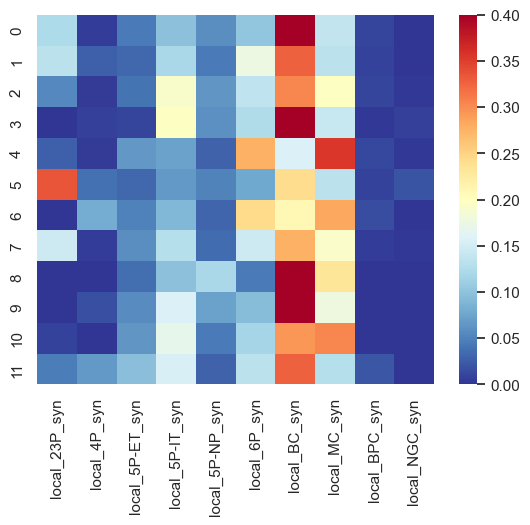

In [9]:
# MAIN
# Figure 4.b (individual cells)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#individual cells
heat_synapse_table_V1_local = synapse_area_table_percentage[synapse_area_table_percentage['local_area'] == 'v1'][['V1_23P_syn','V1_4P_syn','V1_5P-ET_syn','V1_5P-IT_syn','V1_5P-NP_syn','V1_6P_syn','V1_BC_syn','V1_MC_syn','V1_BPC_syn','V1_NGC_syn']]
heat_synapse_table_V1_local = heat_synapse_table_V1_local.rename(columns = {'V1_23P_syn': 'local_23P_syn',
                                                                           'V1_4P_syn': 'local_4P_syn',
                                                                           'V1_5P-ET_syn': 'local_5P-ET_syn',
                                                                           'V1_5P-IT_syn': 'local_5P-IT_syn',
                                                                           'V1_5P-NP_syn': 'local_5P-NP_syn',
                                                                           'V1_6P_syn': 'local_6P_syn',
                                                                           'V1_BC_syn': 'local_BC_syn',
                                                                           'V1_MC_syn': 'local_MC_syn',
                                                                           'V1_BPC_syn': 'local_BPC_syn',
                                                                           'V1_NGC_syn': 'local_NGC_syn'})



heat_synapse_table_HVA_local = synapse_area_table_percentage[synapse_area_table_percentage['local_area'] == 'hva'][['HVA_23P_syn','HVA_4P_syn','HVA_5P-ET_syn','HVA_5P-IT_syn','HVA_5P-NP_syn','HVA_6P_syn','HVA_BC_syn','HVA_MC_syn','HVA_BPC_syn','HVA_NGC_syn']]
heat_synapse_table_HVA_local = heat_synapse_table_HVA_local.rename(columns = {'HVA_23P_syn': 'local_23P_syn',
                                                                           'HVA_4P_syn': 'local_4P_syn',
                                                                           'HVA_5P-ET_syn': 'local_5P-ET_syn',
                                                                           'HVA_5P-IT_syn': 'local_5P-IT_syn',
                                                                           'HVA_5P-NP_syn': 'local_5P-NP_syn',
                                                                           'HVA_6P_syn': 'local_6P_syn',
                                                                           'HVA_BC_syn': 'local_BC_syn',
                                                                           'HVA_MC_syn': 'local_MC_syn',
                                                                           'HVA_BPC_syn': 'local_BPC_syn',
                                                                           'HVA_NGC_syn': 'local_NGC_syn'})


heat_synapse_table_area_local = pd.concat([heat_synapse_table_V1_local, heat_synapse_table_HVA_local]).reset_index(drop=True)

#total_percentages_local = pd.DataFrame(short_synapse_local.sum()) / pd.DataFrame(short_synapse_local.sum()).sum()

sns.set()

ax = sns.heatmap(heat_synapse_table_area_local, cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4b_heatmap_local.pdf", format='pdf', dpi=1200)
plt.savefig('Fig4b_heatmap_local_individual_ETneurons_revision.eps')



plt.show()



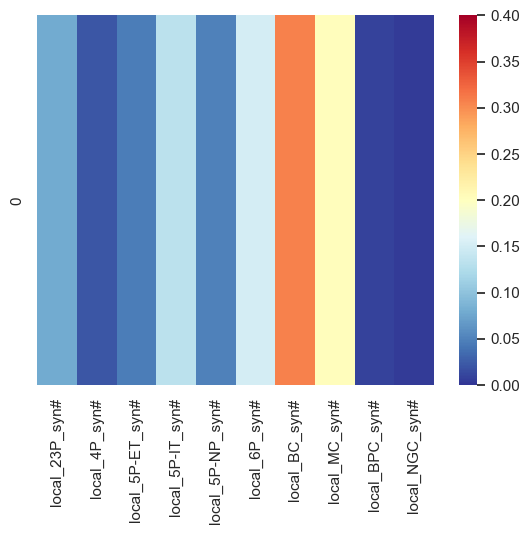

In [10]:
#Figure 4.b (total)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#total percantages
short_synapse_V1local = synapse_area_table_values[synapse_area_table_values['local_area'] == 'v1'][['V1_23P_syn#','V1_4P_syn#','V1_5P-ET_syn#','V1_5P-IT_syn#','V1_5P-NP_syn#',
                                      'V1_6P_syn#','V1_BC_syn#','V1_MC_syn#','V1_BPC_syn#','V1_NGC_syn#']]

short_synapse_V1local = short_synapse_V1local.rename(columns = {'V1_23P_syn#': 'local_23P_syn#',
                                                                           'V1_4P_syn#': 'local_4P_syn#',
                                                                           'V1_5P-ET_syn#': 'local_5P-ET_syn#',
                                                                           'V1_5P-IT_syn#': 'local_5P-IT_syn#',
                                                                           'V1_5P-NP_syn#': 'local_5P-NP_syn#',
                                                                           'V1_6P_syn#': 'local_6P_syn#',
                                                                           'V1_BC_syn#': 'local_BC_syn#',
                                                                           'V1_MC_syn#': 'local_MC_syn#',
                                                                           'V1_BPC_syn#': 'local_BPC_syn#',
                                                                           'V1_NGC_syn#': 'local_NGC_syn#'})


short_synapse_HVAlocal = synapse_area_table_values[synapse_area_table_values['local_area'] == 'hva'][['HVA_23P_syn#','HVA_4P_syn#','HVA_5P-ET_syn#','HVA_5P-IT_syn#','HVA_5P-NP_syn#',
                                      'HVA_6P_syn#','HVA_BC_syn#','HVA_MC_syn#','HVA_BPC_syn#','HVA_NGC_syn#']]

short_synapse_HVAlocal = short_synapse_HVAlocal.rename(columns = {'HVA_23P_syn#': 'local_23P_syn#',
                                                                           'HVA_4P_syn#': 'local_4P_syn#',
                                                                           'HVA_5P-ET_syn#': 'local_5P-ET_syn#',
                                                                           'HVA_5P-IT_syn#': 'local_5P-IT_syn#',
                                                                           'HVA_5P-NP_syn#': 'local_5P-NP_syn#',
                                                                           'HVA_6P_syn#': 'local_6P_syn#',
                                                                           'HVA_BC_syn#': 'local_BC_syn#',
                                                                           'HVA_MC_syn#': 'local_MC_syn#',
                                                                           'HVA_BPC_syn#': 'local_BPC_syn#',
                                                                           'HVA_NGC_syn#': 'local_NGC_syn#'})


short_synapse_local = pd.concat([short_synapse_V1local, short_synapse_HVAlocal]).reset_index(drop=True)


total_percentages_local = pd.DataFrame(short_synapse_local.sum()) / pd.DataFrame(short_synapse_local.sum()).sum()

sns.set()

ax = sns.heatmap(total_percentages_local.transpose(), cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4b_heatmap_local__all_synapses_ETsum_revision.pdf", format='pdf', dpi=1200)
plt.savefig("Fig4b_heatmap_local__all_synapses_ETsum_revision.eps")


plt.show()



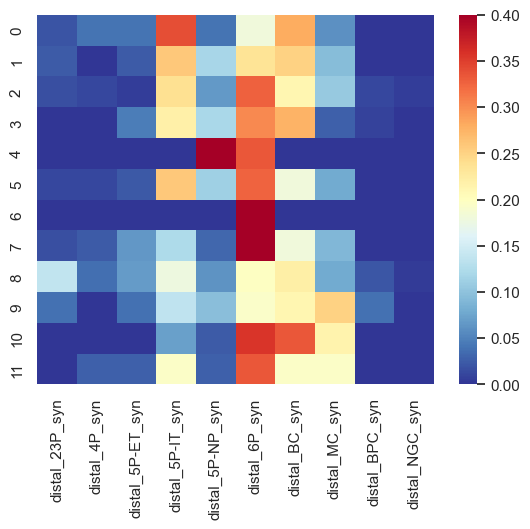

In [11]:
#Figure 4.c (#individual cells)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#individual cells
heat_synapse_table_V1_distal = synapse_area_table_percentage[synapse_area_table_percentage['local_area'] == 'v1'][['HVA_23P_syn','HVA_4P_syn','HVA_5P-ET_syn','HVA_5P-IT_syn','HVA_5P-NP_syn','HVA_6P_syn','HVA_BC_syn','HVA_MC_syn','HVA_BPC_syn','HVA_NGC_syn']]
heat_synapse_table_V1_distal = heat_synapse_table_V1_distal.rename(columns = {'HVA_23P_syn': 'distal_23P_syn',
                                                                           'HVA_4P_syn': 'distal_4P_syn',
                                                                           'HVA_5P-ET_syn': 'distal_5P-ET_syn',
                                                                           'HVA_5P-IT_syn': 'distal_5P-IT_syn',
                                                                           'HVA_5P-NP_syn': 'distal_5P-NP_syn',
                                                                           'HVA_6P_syn': 'distal_6P_syn',
                                                                           'HVA_BC_syn': 'distal_BC_syn',
                                                                           'HVA_MC_syn': 'distal_MC_syn',
                                                                           'HVA_BPC_syn': 'distal_BPC_syn',
                                                                           'HVA_NGC_syn': 'distal_NGC_syn'})


heat_synapse_table_HVA_distal = synapse_area_table_percentage[synapse_area_table_percentage['local_area'] == 'hva'][['V1_23P_syn','V1_4P_syn','V1_5P-ET_syn','V1_5P-IT_syn','V1_5P-NP_syn','V1_6P_syn','V1_BC_syn','V1_MC_syn','V1_BPC_syn','V1_NGC_syn']]
heat_synapse_table_HVA_distal = heat_synapse_table_HVA_distal.rename(columns = {'V1_23P_syn': 'distal_23P_syn',
                                                                           'V1_4P_syn': 'distal_4P_syn',
                                                                           'V1_5P-ET_syn': 'distal_5P-ET_syn',
                                                                           'V1_5P-IT_syn': 'distal_5P-IT_syn',
                                                                           'V1_5P-NP_syn': 'distal_5P-NP_syn',
                                                                           'V1_6P_syn': 'distal_6P_syn',
                                                                           'V1_BC_syn': 'distal_BC_syn',
                                                                           'V1_MC_syn': 'distal_MC_syn',
                                                                           'V1_BPC_syn': 'distal_BPC_syn',
                                                                           'V1_NGC_syn': 'distal_NGC_syn'})



heat_synapse_table_area_distal = pd.concat([heat_synapse_table_V1_distal, heat_synapse_table_HVA_distal]).reset_index(drop=True)


sns.set()

ax = sns.heatmap(heat_synapse_table_area_distal, cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4c_heatmap_interareal_individual.pdf", format='pdf', dpi=1200)

plt.savefig("Fig4c_heatmap_interareal_individual_revision.eps")




plt.show()



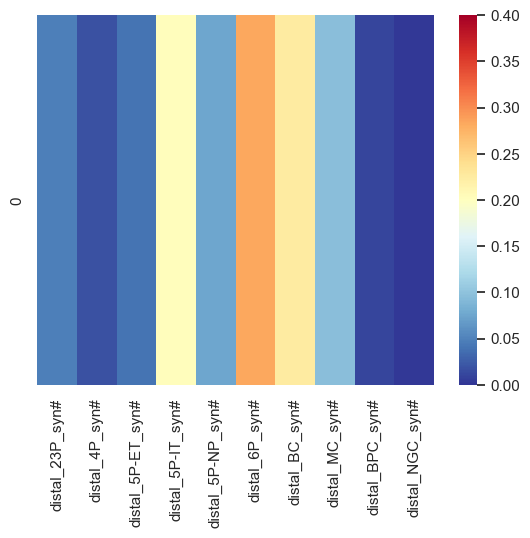

In [12]:
#Figure 4.c (total percantages)

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


#total percantages
short_synapse_V1distal = synapse_area_table_values[synapse_area_table_values['local_area'] == 'v1'][['HVA_23P_syn#','HVA_4P_syn#','HVA_5P-ET_syn#','HVA_5P-IT_syn#','HVA_5P-NP_syn#',
                                      'HVA_6P_syn#','HVA_BC_syn#','HVA_MC_syn#','HVA_BPC_syn#','HVA_NGC_syn#']]


short_synapse_V1distal = short_synapse_V1distal.rename(columns = {'HVA_23P_syn#': 'distal_23P_syn#',
                                                                           'HVA_4P_syn#': 'distal_4P_syn#',
                                                                           'HVA_5P-ET_syn#': 'distal_5P-ET_syn#',
                                                                           'HVA_5P-IT_syn#': 'distal_5P-IT_syn#',
                                                                           'HVA_5P-NP_syn#': 'distal_5P-NP_syn#',
                                                                           'HVA_6P_syn#': 'distal_6P_syn#',
                                                                           'HVA_BC_syn#': 'distal_BC_syn#',
                                                                           'HVA_MC_syn#': 'distal_MC_syn#',
                                                                           'HVA_BPC_syn#': 'distal_BPC_syn#',
                                                                           'HVA_NGC_syn#': 'distal_NGC_syn#'})


short_synapse_HVAdistal = synapse_area_table_values[synapse_area_table_values['local_area'] == 'hva'][['V1_23P_syn#','V1_4P_syn#','V1_5P-ET_syn#','V1_5P-IT_syn#','V1_5P-NP_syn#',
                                      'V1_6P_syn#','V1_BC_syn#','V1_MC_syn#','V1_BPC_syn#','V1_NGC_syn#']]

short_synapse_HVAdistal = short_synapse_HVAdistal.rename(columns = {'V1_23P_syn#': 'distal_23P_syn#',
                                                                           'V1_4P_syn#': 'distal_4P_syn#',
                                                                           'V1_5P-ET_syn#': 'distal_5P-ET_syn#',
                                                                           'V1_5P-IT_syn#': 'distal_5P-IT_syn#',
                                                                           'V1_5P-NP_syn#': 'distal_5P-NP_syn#',
                                                                           'V1_6P_syn#': 'distal_6P_syn#',
                                                                           'V1_BC_syn#': 'distal_BC_syn#',
                                                                           'V1_MC_syn#': 'distal_MC_syn#',
                                                                           'V1_BPC_syn#': 'distal_BPC_syn#',
                                                                           'V1_NGC_syn#': 'distal_NGC_syn#'})

short_synapse_distal = pd.concat([short_synapse_V1distal, short_synapse_HVAdistal]).reset_index(drop=True)


total_percentages_distal = pd.DataFrame(short_synapse_distal.sum()) / pd.DataFrame(short_synapse_distal.sum()).sum()

sns.set()

ax = sns.heatmap(total_percentages_distal.transpose(), cmap='RdYlBu_r', vmin=0, vmax=0.40)


#plt.savefig("Fig4c_heatmap_interareal_total.pdf", format='pdf', dpi=1200)
plt.savefig("Fig4c_heatmap_interareal_total_revision.eps")


plt.show()



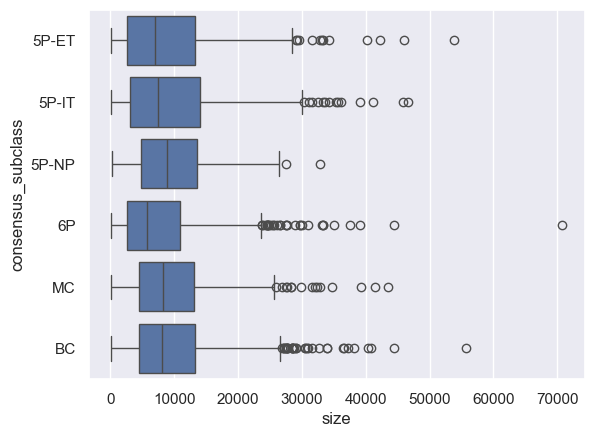

In [13]:
# MAIN
#FIGURE 4.e
import seaborn as sns
sns.boxplot(data=synapse_table, x="size", y="consensus_subclass",order=["5P-ET", "5P-IT", "5P-NP", "6P", "MC", "BC"])

plt.savefig('Fig4e_size all types_revision.eps')


In [14]:
# MAIN
# Statistical analysis

#analysis of variance
from scipy import stats

stats.kruskal(synapse_table.query("consensus_subclass == '5P-ET'")['size'].values,
              synapse_table.query("consensus_subclass == '5P-IT'")['size'].values,
              synapse_table.query("consensus_subclass == '5P-NP'")['size'].values,
              synapse_table.query("consensus_subclass == '6P'")['size'].values,
              synapse_table.query("consensus_subclass == 'BC'")['size'].values,
              synapse_table.query("consensus_subclass == 'MC'")['size'].values)


KruskalResult(statistic=np.float64(79.37260302946336), pvalue=np.float64(1.1352511812198675e-15))

In [15]:
# MAIN
# Statistical analysis
# Multiple comparisions

data = [synapse_table.query("consensus_subclass == '5P-ET'")['size'].values,
              synapse_table.query("consensus_subclass == '5P-IT'")['size'].values,
              synapse_table.query("consensus_subclass == '5P-NP'")['size'].values,
              synapse_table.query("consensus_subclass == '6P'")['size'].values,
              synapse_table.query("consensus_subclass == 'BC'")['size'].values,
              synapse_table.query("consensus_subclass == 'MC'")['size'].values]


#perform Dunn's test using a Bonferonni correction for the p-values
import scikit_posthocs as sp
sp.posthoc_conover(data, p_adjust = 'bonferroni')




,1,2,3,4,5,6
1,1.000000,1.000000,1.219199e-01,3.545300e-01,3.754173e-01,3.972221e-01
2,1.000000,1.000000,4.124549e-01,6.011081e-06,1.000000e+00,1.000000e+00
3,0.121920,0.412455,1.000000e+00,4.309735e-08,1.000000e+00,1.000000e+00
4,0.354530,0.000006,4.309735e-08,1.000000e+00,1.091584e-13,2.170025e-11
5,0.375417,1.000000,1.000000e+00,1.091584e-13,1.000000e+00,1.000000e+00
6,0.397222,1.000000,1.000000e+00,2.170025e-11,1.000000e+00,1.000000e+00


In [ ]:
# MAIN
# Skewness of ET and NP distributions

NPsyn = synapse_table.query("consensus_subclass == '5P-NP'")['size'].values
ETsyn = synapse_table.query("consensus_subclass == '5P-ET'")['size'].values

NPskew = stats.skew(NPsyn)
print('NPskew: ', NPskew)

ETskew = stats.skew(ETsyn)
print('ETskew: ', ETskew)

In [ ]:
# MAIN
# Kurtosis of ET and NP distributions

NPkurt = stats.kurtosis(NPsyn)
print('NPskew: ', NPkurt)

ETkurt = stats.kurtosis(ETsyn)
print('ETskew: ', ETkurt)


In [ ]:
# MAIN
# KS test

stats.kstest(NPsyn, ETsyn)

In [ ]:
# MAIN
# FIGURE 4.f
import seaborn as sns

synapse_table_NP_ET = synapse_table[(synapse_table['consensus_subclass'] == '5P-ET') |
                                     (synapse_table['consensus_subclass'] == '5P-NP')]

#fig, ax = plt.subplots()

kde_dict = {
            'bw_adjust' : 0.7,
            
}

sns.histplot(synapse_table_NP_ET,
            x="size" , hue = 'consensus_subclass', kde = True, kde_kws = kde_dict, fill=False, binwidth=2000, element="step")




#ax.set(xlim=(0, 50000))

plt.savefig('Fig4f_ET_to_ET_and_NP_revision.eps')


In [ ]:
# MAIN
# Histogram
# FIGURE 4.g

import seaborn as sns

ET_NP = synapse_table[synapse_table['consensus_subclass'] == '5P-NP'][['size','consensus_subclass']]

NP_targets = synapse_table[synapse_table['consensus_subclass'] == '5P-NP']['post_pt_root_id'].unique()

NP_all_inputs = client.materialize.synapse_query(post_ids=NP_targets)

NP_all_inputs[['size','pre_pt_supervoxel_id']].rename(columns={"pre_pt_supervoxel_id": "consensus_subclass"})

NP_all_inputs['consensus_subclass'] = 'input'

synapse_table_NP_NP = pd.concat([ET_NP, NP_all_inputs], axis=0)

#sns.displot(synapse_table_NP_NP,
#            x="size", kind="kde", hue = 'consensus_subclass', common_norm=False )

kde_dict = {
            'bw_adjust' : 0.7,
            'clip' : (0, 40000)
            
}

fig, ax = plt.subplots()

sns.histplot(synapse_table_NP_NP,
            x="size" , hue = 'consensus_subclass', kde = True, kde_kws = kde_dict, fill=False,
             binwidth=2000, element="step",  stat="density", common_norm=False,ax = ax)



#sns.kdeplot(ET_NP, x="size", hue = 'consensus_subclass', multiple="stack")



ax.set_xlim(0,40000)



plt.savefig('Fig4g_ET_to_NP_and_allNP_revision.eps')

#ax.set(xlim=(0, 75000))

In [ ]:
import seaborn as sns

palette = sns.color_palette('Oranges') # Default color palette
print(palette)  # Prints the RGB tuples that make up this color palette
sns.palplot(palette) # Plotting your palette!
#sns.palplot(sns.color_palette('husl', 10)) # Seaborn color palette, with 10 colors
#sns.color_palette("rocket", as_cmap=True) # Get a CMap

In [ ]:
{'NGC': (0.8370472895040368, 0.13394848135332565, 0.13079584775086506),
 'BPC': (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 'MC': (0.01619377162629758, 0.3641061130334487, 0.5707035755478662),
 'BC': (0.6768627450980392, 0.22089965397923875, 0.010749711649365626),
}